In [1]:
import sys
from os.path import join
import numpy as np
import importlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
sys.path.append('/home/gcgreen2/alignment/SequenceAlignmentAndSketching')
import loc_minhash as lmh
from utils import seq_utils as su
from utils import hash_utils as hu

In [53]:
importlib.reload(lmh)
importlib.reload(lmh.hu)
importlib.reload(hu)

<module 'utils.hash_utils' from '/home/gcgreen2/alignment/SequenceAlignmentAndSketching/utils/hash_utils.py'>

In [54]:
PROJ_DIR = '/home/gcgreen2/alignment'
ALN_DIR = join(PROJ_DIR, 'out/mh')
GT_DIR = join(PROJ_DIR, 'spectral_jaccard_similarity/groundTruths')
FASTA_DIR = join(PROJ_DIR, 'spectral_jaccard_similarity/filtered_fasta')
DATASETS = np.loadtxt(join(PROJ_DIR,'NCTC_list.txt'), dtype=str)

In [55]:
def load_dfs(dataset): # load the alignment files
    gt_path = join(GT_DIR, dataset+'_daligner_ground_truth.txt')
    aln_path = join(ALN_DIR, dataset+'_aln.tsv')
    gt_df = pd.read_csv(gt_path, sep='\t', header=None, names=['i1','i2','overlap','l1','l2'])
    aln_df = pd.read_csv(aln_path, sep='\t', header=None, names=['i1','i2','overlap','l1','l2'])
    return gt_df, aln_df

In [5]:
gt_df, aln_df = load_dfs(DATASETS[0])

In [6]:
aln_df = aln_df.sort_values('overlap', ascending=False)
aln_df.head()

,i1,i2,overlap,l1,l2
17686,182,956,3192.7,16320,26781
103118,956,182,3192.7,26781,16320
65456,616,861,3024.1,21913,21433
92767,861,616,3024.1,21433,21913
27295,272,956,2966.5,18564,26781


In [7]:
top_read_pairs = aln_df.iloc[:10,:2].values.tolist()

In [8]:
top_read_pairs

[[182, 956],
 [956, 182],
 [616, 861],
 [861, 616],
 [272, 956],
 [956, 272],
 [834, 821],
 [821, 834],
 [595, 995],
 [995, 595]]

In [60]:
ld = np.array([1,2,100,1000,1100,2000])
lmh.weight_collisions(ld)

5

# Location Differences

In [31]:
fasta_file = join(FASTA_DIR, DATASETS[0]+'_reads.fasta')
seqs = su.get_seqs(fasta_file)
top_reads = [[seqs[p[0]-1], seqs[p[1]-1]] for p in top_read_pairs]
loc_minhashes = [lmh.get_all_loc_minhashes(reads, k=16, n_hash=1000, n_bits=24) for reads in top_reads]

[182, 956]   len1 16320   len2 26781   # collisions 35


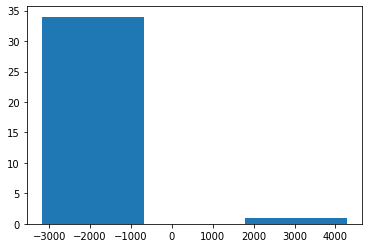

[956, 182]   len1 26781   len2 16320   # collisions 39


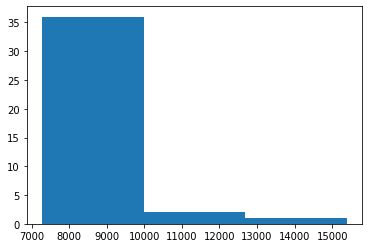

[616, 861]   len1 21913   len2 21433   # collisions 42


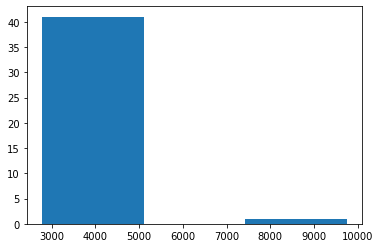

[861, 616]   len1 21433   len2 21913   # collisions 42


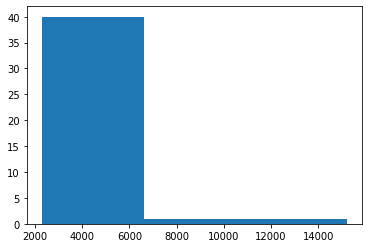

[272, 956]   len1 18564   len2 26781   # collisions 31


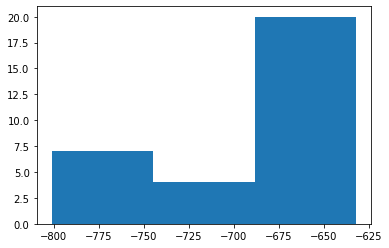

[956, 272]   len1 26781   len2 18564   # collisions 31


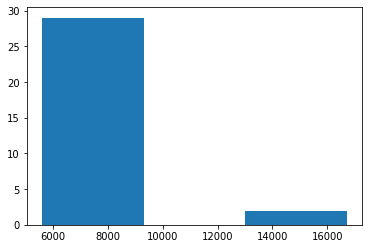

[834, 821]   len1 17502   len2 18585   # collisions 44


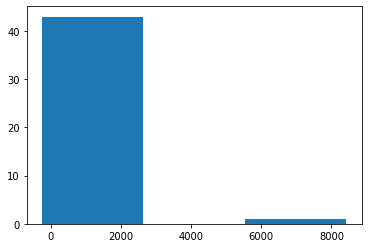

[821, 834]   len1 18585   len2 17502   # collisions 62


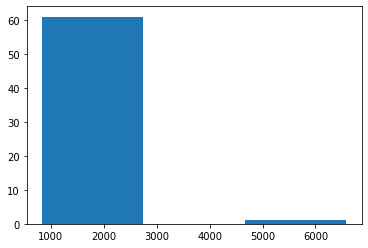

[595, 995]   len1 19460   len2 17565   # collisions 38


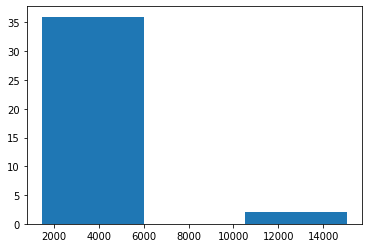

[995, 595]   len1 17565   len2 19460   # collisions 55


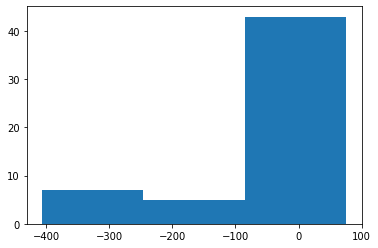

In [52]:
for i in range(len(loc_minhashes)):
    loc_minhashes1, loc_minhashes2 = loc_minhashes[i]
    len1, len2 = [len(r) for r in top_reads[i]]
    loc_diffs = lmh.overlap_est(loc_minhashes1, loc_minhashes2, len1, len2)
    print(top_read_pairs[i], '  len1',len1, '  len2',len2,'  # collisions',len(loc_diffs))
    diffs, counts = np.unique(loc_diffs, return_counts=True)
    plt.figure()
#     plt.stem(diffs,counts)
    plt.hist(loc_diffs, bins=3)
    plt.pause(0.01)